# Breast cancer type detection

Using various Python-based Machine Learning and Data Science libraries in an attempt to build a machine learning model that can reliably predict whether or not someone has benign or malignant breast cancer based on their medical attributes

**Approach**
1. Problem Definition
2. Data
3. Evaluation / Goal
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

**Problem statement:**
> Can we predict whether or not a person has benign or malignant nreast cancer, given their clinical parameters?

## 2. Data
Breast Cancer Wisconsin (Diagnostic) dataset (WDBC) : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## 3. Evaluation / Goal
> Reaching 95% accuracy when predicting the heart diesase by the end of the project.

## 4. Dataset Attributes:

1. **ID**: A unique identifier for each patient or sample.
2. **Diagnosis**: Diagnosis of the breast tumor (`M` = Malignant, `B` = Benn).#
#
## Attributes measured for enucleus:
:##

### Set 1 - Mean values (often considered the most significant features):
3. **radius1**: Mean of distances from center to points on the perimeter of the cell nucleus.
4. **texture1**: Standard deviation of gray-scale values (texture).
5. **perimeter1**: Perimeter of the cell nucleus.
6. **area1**: Area of the cell nucleus.
7. **smoothness1**: Local variation in radius lengths (measure of smoothness of the borders).
8. **compactness1**: (Perimeter² / Area) - 1.0, a measure of how compact the shape is.
9. **concavity1**: Severity of concave portions of the contour.
10. **concave_points1**: Number of concave portions of the contour.
11. **symmetry1**: Symmetry of the cell nucleus.
12. **fractal_dimension1**: "Coastline approximation" - a measure of thecomplexity of t#h#e boundary.

### Set 2 - Standard error (measure of uncertainty or variation):
13. **radius2**: Standard error for radius.
14. **texture2**: Standard error for texture.
15. **perimeter2**: Standard error for perimeter.
16. **area2**: Standard error for area.
17. **smoothness2**: Standard error for smoothness.
18. **compactness2**: Standard error for compactness.
19. **concavity2**: Standard error for concavity.
20. **concave_points2**: Standard error for concave points.
21. **symmetry2**: Standard error for symmetry.
22. **fractal_dimension2**: Standard erro#r# for fractal dimension.

### Set 3 - Worst or largest values (computed across all cells in the image):
23. **radius3**: Worst (largest) value for radius.
24. **texture3**: Worst value for texture.
25. **perimeter3**: Worst value for perimeter.
26. **area3**: Worst value for area.
27. **smoothness3**: Worst value for smoothness.
28. **compactness3**: Worst value for compactness.
29. **concavity3**: Worst value for concavity.
30. **concave_points3**: Worst value for concave points.
31. **symmetry3**: Worst value for symmetry.
32. **fractal_dimension3**: Worst value for fractal dimension.

These features are derived from digitized images of fine needle aspirates (FNA) of breast masses, used for the classification task of determining whether the tumor is benign or malignant.



## Exploratory Data Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from  sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Importing dataset

In [2]:
df = pd.read_csv('../Datasets/wdbc.data')

### Analyzing dataset

In [3]:
headers=["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1",
    "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2",
    "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3",
    "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

In [4]:
df.columns=headers

In [5]:
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
df.tail()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
df.dtypes

ID                      int64
Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [8]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Checking for nulls

In [9]:
df.isna().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

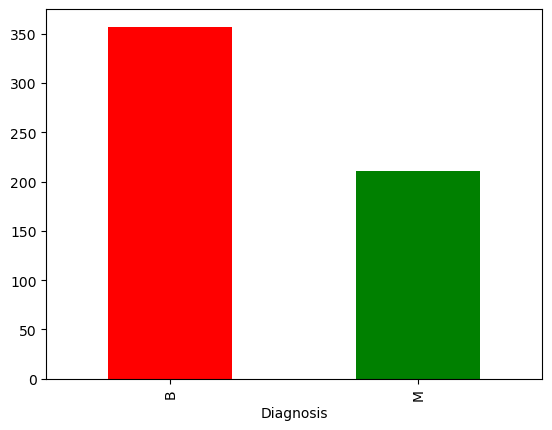

In [10]:
df["Diagnosis"].value_counts().plot(kind="bar", color=["red","green"])
plt.show()

In [11]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Cleaning and Preparing

In [12]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Diagnosis']= label_encoder.fit_transform(df['Diagnosis'])
df['Diagnosis'].unique()

array([1, 0])

### Finding Patterns

#### Diagnosis vs Frequency

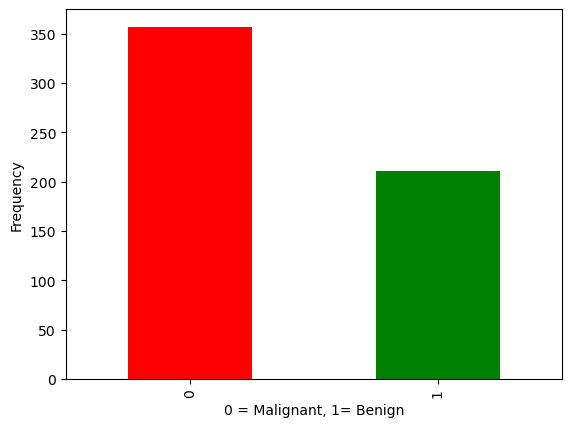

In [13]:
df["Diagnosis"].value_counts().plot(kind="bar", color=["red","green"])
plt.xlabel("0 = Malignant, 1= Benign")
plt.ylabel("Frequency")
plt.show()

In [14]:
df.corr()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,1.000000,0.040370,0.075166,0.099288,0.073796,0.097390,-0.012343,0.001476,0.051507,0.045472,...,0.083457,0.064262,0.081329,0.108408,0.010899,-0.001891,0.024177,0.036300,-0.043371,-0.029157
Diagnosis,0.040370,1.000000,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,...,0.775725,0.461443,0.782470,0.732925,0.419731,0.589453,0.658348,0.793181,0.413382,0.320983
radius1,0.075166,0.729376,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,...,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
texture1,0.099288,0.422146,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,...,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
perimeter1,0.073796,0.741887,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,...,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
area1,0.097390,0.708389,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,...,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
smoothness1,-0.012343,0.356276,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,...,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
compactness1,0.001476,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,...,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
concavity1,0.051507,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,...,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
concave_points1,0.045472,0.776369,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,...,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277


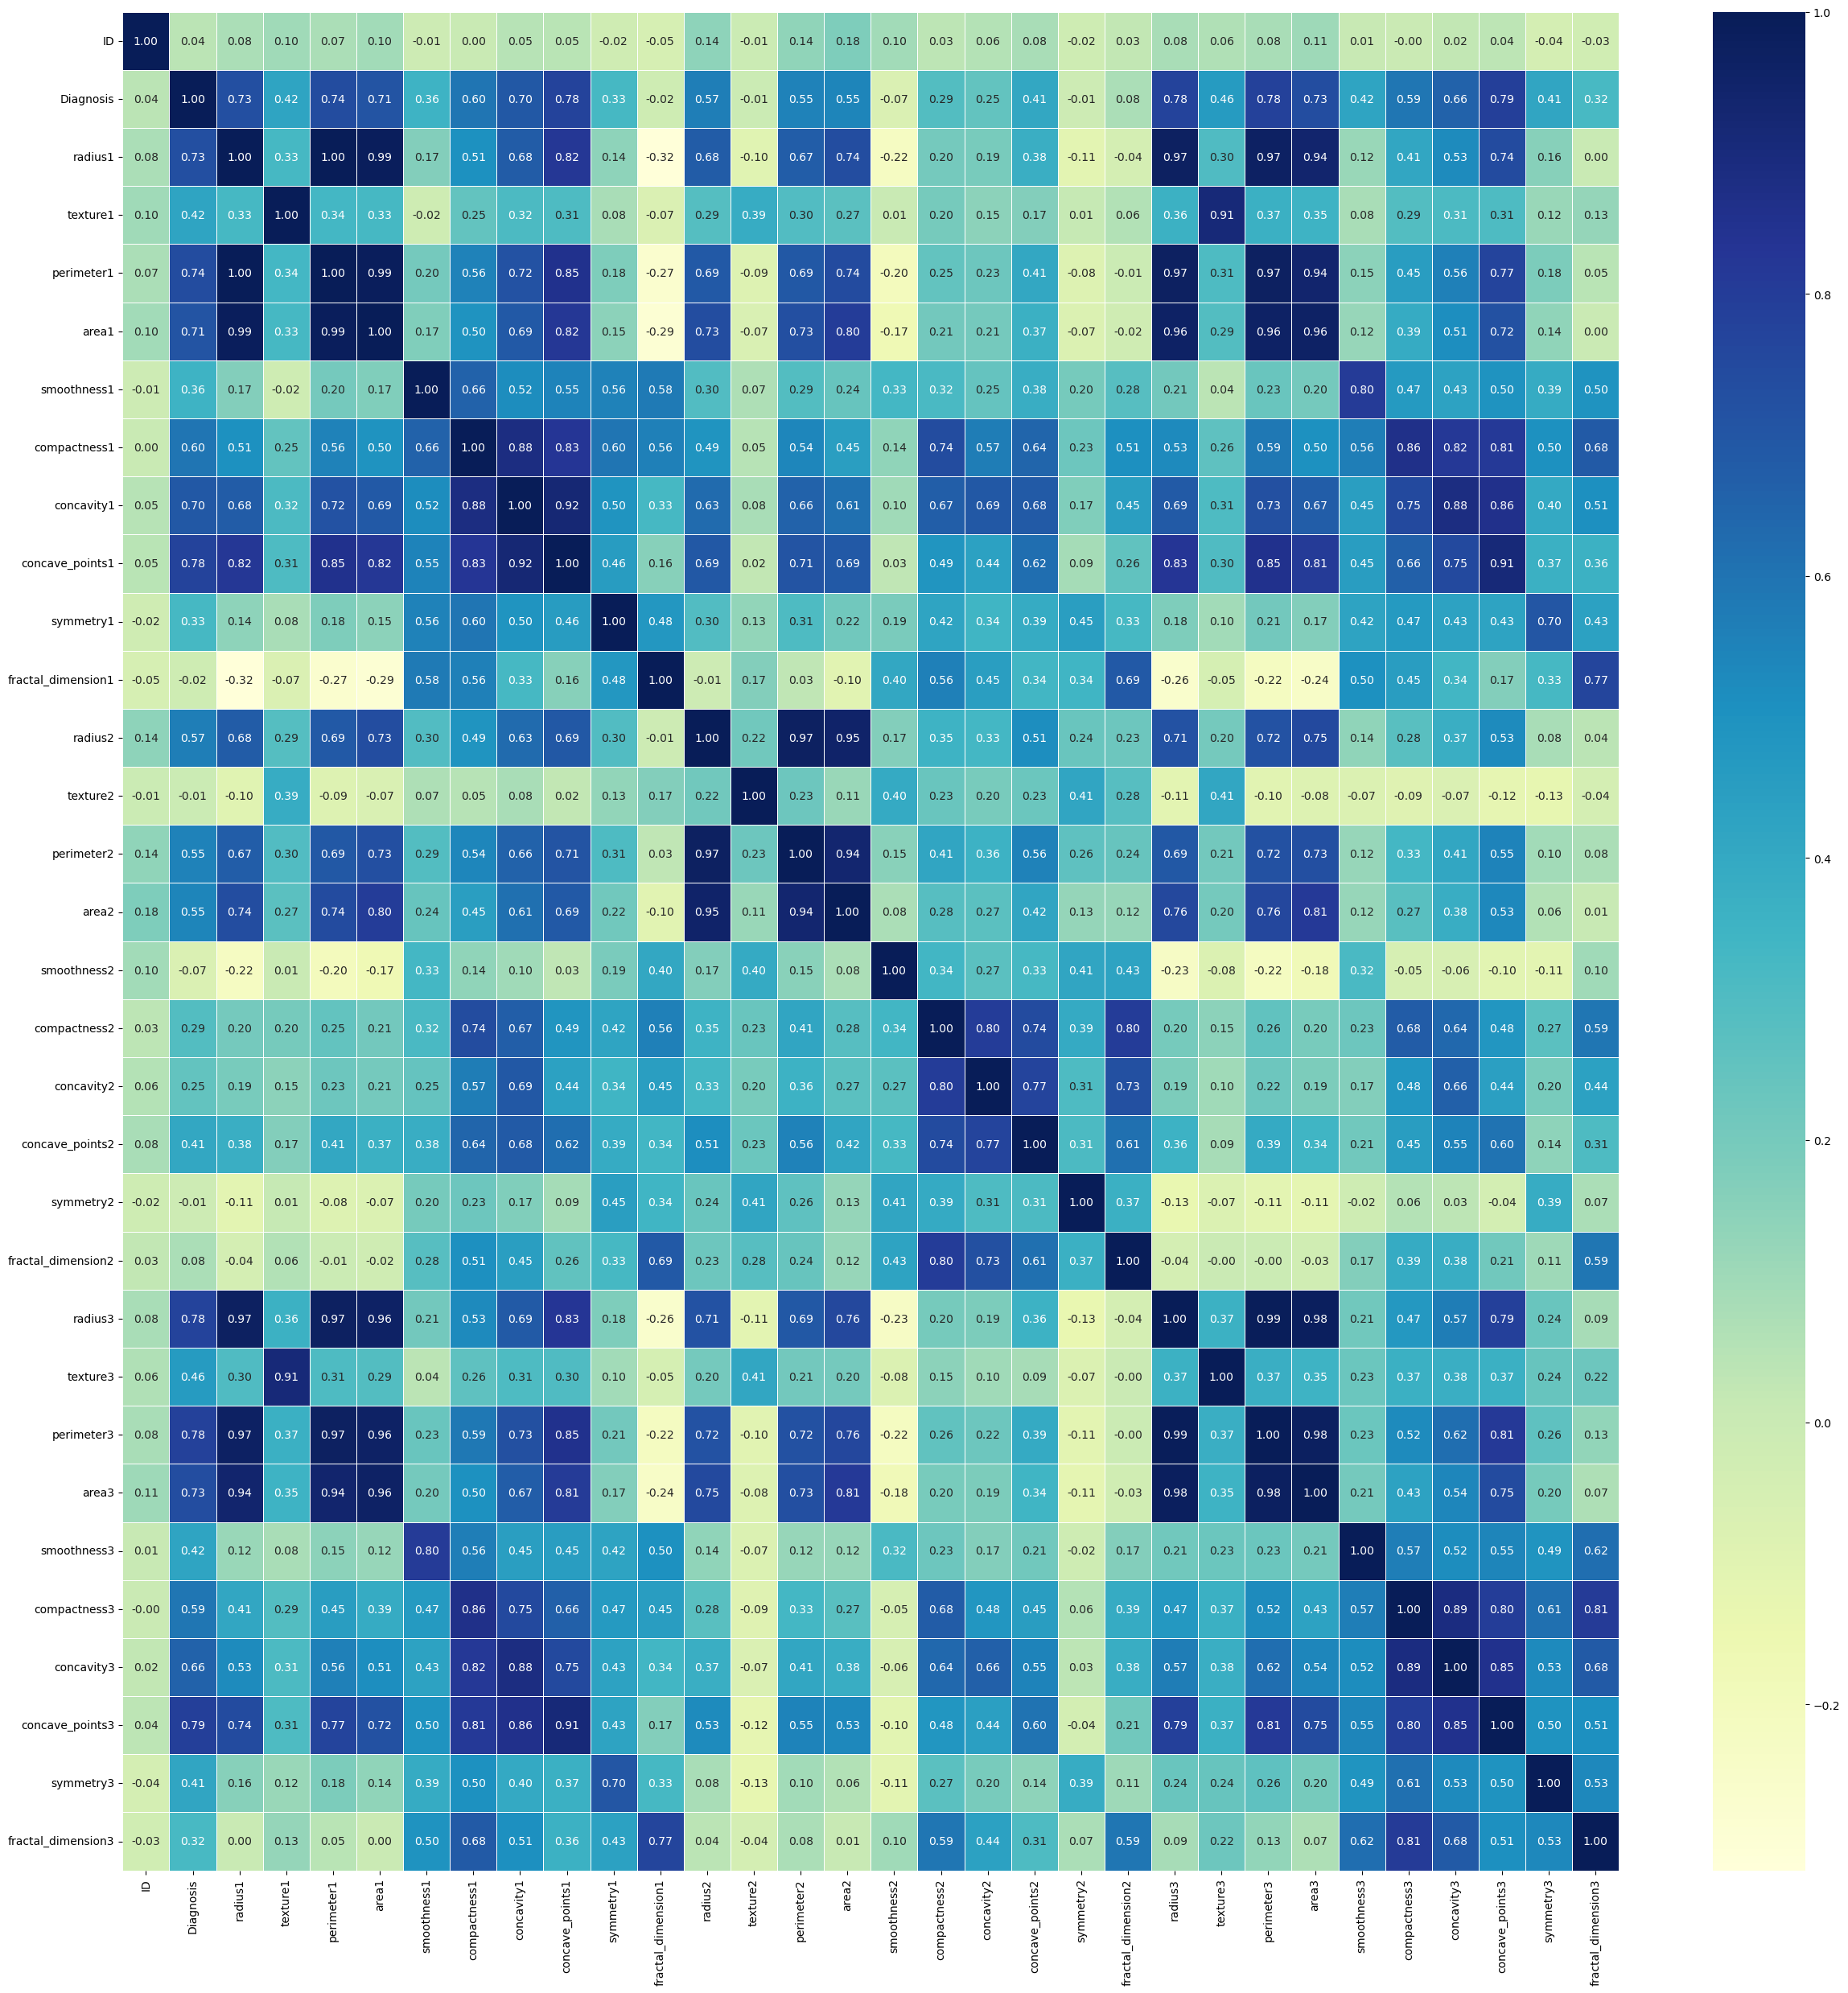

In [15]:
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(30,30))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")
plt.show()

#### Concave_Points3 vs Diagnosis

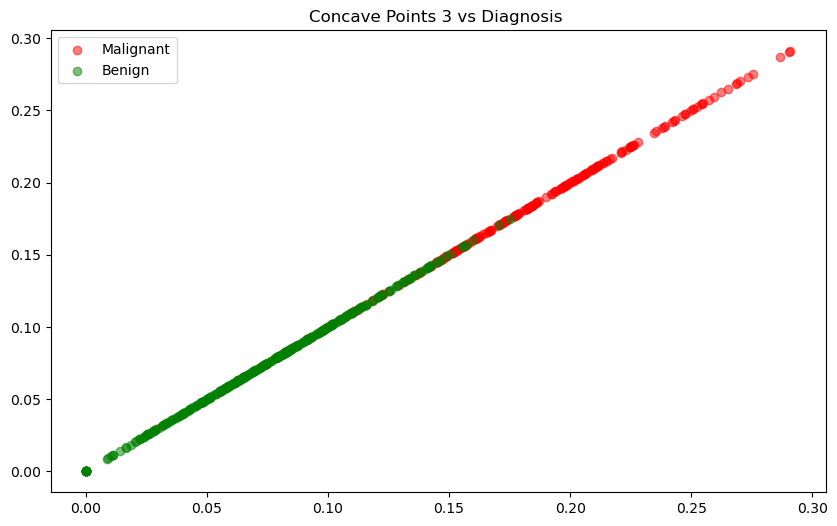

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df["concave_points3"][df["Diagnosis"]==1], df["concave_points3"][df["Diagnosis"]==1], color="red", alpha = 0.5)
plt.scatter(df["concave_points3"][df["Diagnosis"]==0], df["concave_points3"][df["Diagnosis"]==0], color="green", alpha=0.5)
plt.title("Concave Points 3 vs Diagnosis ")
plt.legend(["Malignant","Benign"])
plt.show()

#### Preimeter 3 vs Diagnosis 

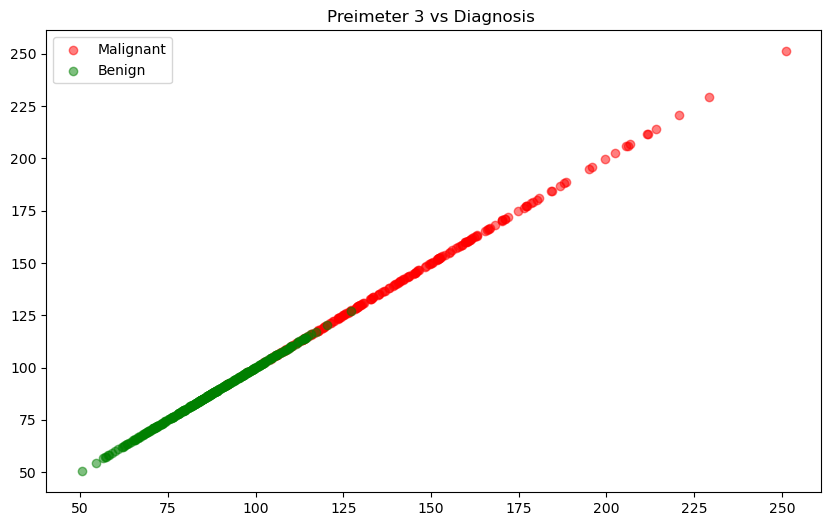

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df["perimeter3"][df["Diagnosis"]==1], df["perimeter3"][df["Diagnosis"]==1], color="red", alpha = 0.5)
plt.scatter(df["perimeter3"][df["Diagnosis"]==0], df["perimeter3"][df["Diagnosis"]==0], color="green", alpha=0.5)
plt.title("Preimeter 3 vs Diagnosis ")
plt.legend(["Malignant","Benign"])
plt.show()

#### Concave points 1 vs Diagnosis

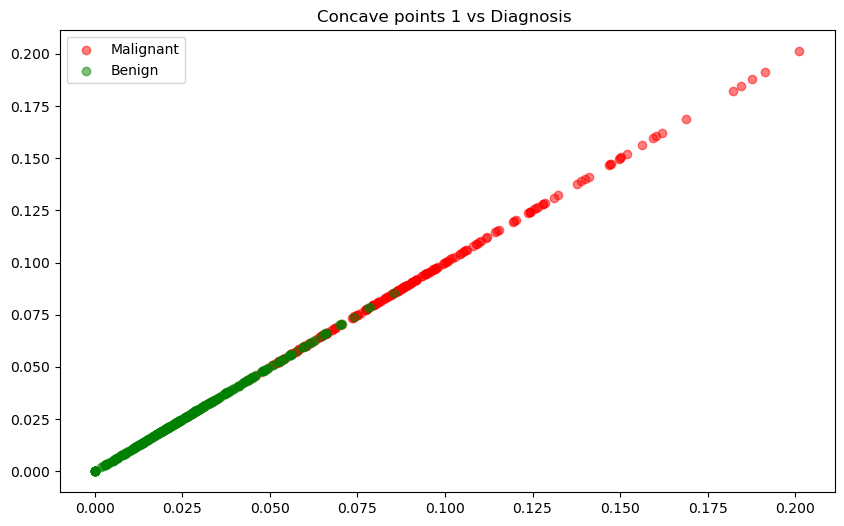

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df["concave_points1"][df["Diagnosis"]==1], df["concave_points1"][df["Diagnosis"]==1], color="red", alpha = 0.5)
plt.scatter(df["concave_points1"][df["Diagnosis"]==0], df["concave_points1"][df["Diagnosis"]==0], color="green", alpha=0.5)
plt.title("Concave points 1 vs Diagnosis ")
plt.legend(["Malignant","Benign"])
plt.show()

### Splitting into features and goals

In [19]:
X=df.drop('Diagnosis',axis=1);
y=df['Diagnosis']

### Splitting into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,4.540000e+02,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.256187e+07,14.111916,19.152775,91.816498,653.628194,0.096099,0.102988,0.087978,0.048330,0.181348,...,16.195989,25.415771,106.774427,873.116300,0.131821,0.250119,0.268682,0.112972,0.288939,0.083503
std,1.326600e+08,3.539123,4.129924,24.344595,349.935899,0.014202,0.051207,0.079877,0.038678,0.027044,...,4.822178,6.069725,33.418462,560.574124,0.023226,0.156389,0.210303,0.065642,0.058276,0.017752
min,8.670000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.120300,...,7.930000,12.870000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.689030e+05,11.645000,16.092500,74.385000,415.625000,0.086012,0.062885,0.026935,0.019672,0.162725,...,12.857500,20.930000,83.535000,508.300000,0.114400,0.141650,0.105125,0.063532,0.250425,0.071035
50%,9.056000e+05,13.375000,18.785000,86.220000,551.400000,0.095020,0.091255,0.059345,0.032570,0.179200,...,14.910000,25.080000,97.380000,683.950000,0.131200,0.211650,0.223050,0.097110,0.283150,0.079870
75%,8.910666e+06,16.115000,21.582500,104.600000,799.700000,0.105375,0.130575,0.131600,0.074670,0.196600,...,18.540000,29.372500,125.325000,1048.500000,0.146000,0.324700,0.380575,0.161150,0.317475,0.091838
max,9.113205e+08,28.110000,33.810000,188.500000,2499.000000,0.163400,0.286700,0.426800,0.201200,0.304000,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.555800,0.207500


In [22]:
X_test.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.190912e+07,14.154640,19.912895,92.306053,656.874561,0.097207,0.108210,0.090216,0.050403,0.179886,...,16.480789,26.791667,108.521404,900.333333,0.134286,0.267168,0.282294,0.119793,0.293109,0.085404
std,8.897183e+07,3.475363,4.841486,24.153174,361.290700,0.013429,0.056746,0.077248,0.038499,0.028482,...,4.837422,6.328415,33.809581,597.998613,0.021098,0.157005,0.199029,0.064850,0.073177,0.019041
min,9.047000e+03,7.729000,9.710000,47.980000,178.800000,0.062510,0.019380,0.000000,0.000000,0.106000,...,9.077000,12.020000,57.170000,248.000000,0.081250,0.034320,0.000000,0.000000,0.156600,0.058430
25%,8.702355e+05,11.840000,16.497500,76.815000,432.200000,0.088712,0.068050,0.036935,0.023265,0.161550,...,13.360000,22.145000,86.752500,550.950000,0.120250,0.166925,0.145675,0.069142,0.249125,0.072140
50%,9.089400e+05,13.290000,19.345000,86.210000,544.500000,0.096990,0.095670,0.067805,0.037235,0.179250,...,15.125000,26.685000,98.620000,700.200000,0.134700,0.215250,0.236700,0.108750,0.277300,0.081405
75%,8.711152e+06,15.690000,22.647500,102.525000,765.375000,0.104650,0.129675,0.120325,0.068050,0.193425,...,18.992500,30.695000,124.175000,1121.000000,0.144725,0.357400,0.385575,0.162725,0.320350,0.092075
max,9.112962e+08,27.420000,39.280000,186.900000,2501.000000,0.142500,0.345400,0.375400,0.184500,0.290600,...,36.040000,45.410000,251.200000,4254.000000,0.209800,0.866300,1.170000,0.286700,0.663800,0.173000


In [23]:
y_train.describe()

count    454.000000
mean       0.363436
std        0.481519
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Diagnosis, dtype: float64

In [24]:
y_test.describe()

count    114.000000
mean       0.403509
std        0.492767
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Diagnosis, dtype: float64

### Normalizing data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.fit_transform(X_test)

## Model Building and Comparing


### 1. Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gnb = GaussianNB()
y_pred = gnb.fit(X_train1, y_train).predict(X_test1)

accuracyNB = accuracy_score(y_test, y_pred)
precisionNB = precision_score(y_test, y_pred, average='macro')
recallNB = recall_score(y_test, y_pred, average='macro')
f1NB = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracyNB)
print("Precision:", precisionNB)
print("Recall:", recallNB)
print("F1 Score:", f1NB)

Accuracy: 0.9298245614035088
Precision: 0.9402027027027027
Recall: 0.9165601023017903
F1 Score: 0.9253193580085162


### 2. Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train1, y_train)
y_pred = log_reg.predict(X_test1)


accuracyLR = accuracy_score(y_test, y_pred)
precisionLR = precision_score(y_test, y_pred, average='macro')
recallLR = recall_score(y_test, y_pred, average='macro')
f1LR = f1_score(y_test, y_pred, average='macro')


print("Accuracy:", accuracyLR)
print("Precision:", precisionLR)
print("Recall:", recallLR)
print("F1 Score:", f1LR)

Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9347826086956521
F1 Score: 0.9439895185063871


### K-Nearest Neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train)
y_pred = knn.predict(X_test1)

accuracyKNN = accuracy_score(y_test, y_pred)
precisionKNN = precision_score(y_test, y_pred, average='macro')
recallKNN = recall_score(y_test, y_pred, average='macro')
f1KNN = f1_score(y_test, y_pred, average='macro')


print("Accuracy:", accuracyKNN)
print("Precision:", precisionKNN)
print("Recall:", recallKNN)
print("F1 Score:", f1KNN)

Accuracy: 0.956140350877193
Precision: 0.9657534246575342
Recall: 0.9456521739130435
F1 Score: 0.9535338713621913


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train1, y_train)

y_pred = dt_classifier.predict(X_test1)


accuracyDT = accuracy_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred, average='macro')
recallDT = recall_score(y_test, y_pred, average='macro')
f1DT = f1_score(y_test, y_pred, average='macro')



print("Accuracy:", accuracyDT)
print("Precision:", precisionDT)
print("Recall:", recallDT)
print("F1 Score:", f1DT)

Accuracy: 0.8859649122807017
Precision: 0.8895756765786835
Recall: 0.8727621483375959
F1 Score: 0.8791880655416973


**Based upon the above results, we will try improving the KNN model even further by Hyperparameter t**

In [30]:
#Preforms model evaluation
from sklearn.model_selection import cross_val_score
def evalClf(model, X, y):
    a=np.mean(cross_val_score(model, X, y, cv =5, scoring = "accuracy"))
    p=np.mean(cross_val_score(model, X, y, cv =5, scoring = "precision"))
    r=np.mean(cross_val_score(model, X, y, cv =5, scoring = "recall"))
    metric_dict = {"Accuracy":round(a,4),
                  "Precision":round(p,2),
                  "Recall":round(r,2)}
    print(f"Accuracy: {a*100:.2f}%")
    print(f"Precision: {p:.2f}")
    print(f"Recall: {r:.2f}")
    return metric_dict

In [31]:
neighbours=range(1,21)
train_scores=[]
test_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train1,y_train)
    train_scores.append(model.score(X_train1,y_train))
    test_scores.append(model.score(X_test1,y_test))

In [32]:
train_scores

[1.0,
 0.9713656387665198,
 0.9779735682819384,
 0.9779735682819384,
 0.9801762114537445,
 0.9757709251101322,
 0.9757709251101322,
 0.9801762114537445,
 0.9779735682819384,
 0.9757709251101322,
 0.9757709251101322,
 0.9669603524229075,
 0.9713656387665198,
 0.9669603524229075,
 0.9713656387665198,
 0.9647577092511013,
 0.9647577092511013,
 0.9625550660792952,
 0.9625550660792952,
 0.9581497797356828]

In [33]:
test_scores

[0.956140350877193,
 0.9298245614035088,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315]

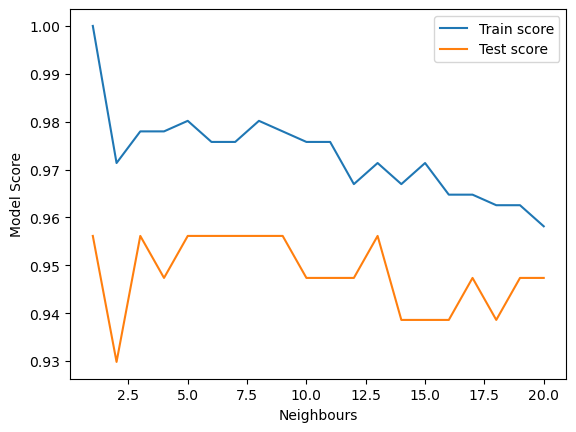

Max KNN Score on test data: 95.61%


In [34]:
plt.plot(neighbours,train_scores, label="Train score")
plt.plot(neighbours,test_scores, label = "Test score")
plt.xlabel("Neighbours")
plt.ylabel("Model Score")
plt.legend()
plt.show()

print(f"Max KNN Score on test data: {max(test_scores)*100:.2f}%")

### HyperParameter tuning using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

grid= { 'n_neighbors' : [3,5,6,7,8,9,10,13],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_model = GridSearchCV(KNeighborsClassifier(),
                       param_grid=grid,
                       cv=5,
                       verbose=False)
gs_model.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 6, 7, 8, 9, 10, 13],
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [36]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [37]:
gs_model.score(X_test1, y_test)

0.956140350877193

In [38]:
import warnings
warnings.filterwarnings("ignore")
evalClf(gs_model,X,y)

Accuracy: 96.83%
Precision: 0.98
Recall: 0.94


{'Accuracy': 0.9683, 'Precision': 0.98, 'Recall': 0.94}

> The final model has an Accuracy of 96.83 %, Precision of 0.98 and Recall of 0.94.
> 
> Which exceeds the initial goal we set, hence we can deploy this model.
>
> Uncomment and run the code below to export the model and use it.

In [39]:
# from joblib import dump
# dump(gs_model,filename = "BreastCancerModel.joblib")